
## Plan:

1. Develope the algorithm for branching structure initialization (2D, 3D)
2. Fitting a pattern into different geometries (as Voronoi cells)
3. Exstract Sholls data -> analyze probabilities for certain cell type
4. Include these propabilities into the code 
5. Generate a few artificial skeletons
6. Compare real images of the cells and artificial ones
7. Make branches as a weighted graph

## Brainstorm

[x] Neighborhood checking

[x] Point cloud update via Dk event

[x] Straight branch

[ ] Add stohastic component into directions

[ ] Add Fork() (bifurcations/nested branches)

[ ] Add limitation on total number of daughter branches (Termination of Fork() function)

In [2]:

import matplotlib.pyplot as plt
import numpy as np
from random import random
from shapely.geometry import LineString
import seaborn as sns
sns.set_style("dark")
from scipy.spatial import KDTree
import sys
sys.setrecursionlimit(10000)
from copy import copy
from tqdm import tqdm
from scipy.spatial.transform import Rotation as R
import shapely.ops
 

# Tree generator

- **Attractors** are focal points of natural resources that promote growth
- **Nodes** are the points through which lines are drawn to render branches. More nodes mean more fidelity, but poorer performance


### _Initial seed - cloud of points_

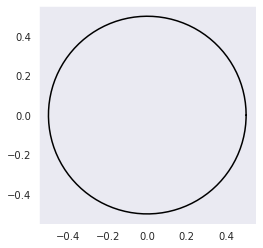

In [3]:
theta = np.linspace(0, np.pi*2, 200)
R = .5

a = R * np.cos(theta)
b = R * np.sin(theta)

figure, axes = plt.subplots()

axes.plot(a,b, c = 'black')
axes.set_aspect(1)

In [122]:
def inner_points(R):
    while True:
        x = np.random.random()*2 - 1
        y = np.random.random()*2 - 1
        if x*x + y*y < R:
            return x, y

In [123]:
inner_points(1)

(-0.13349821619529156, 0.1536018892490949)

In [124]:

l = []
for i in range (1000):
    x = inner_points(1)
    l.append(x)
p = np.array(l)

In [7]:
# p[:,0]

In [125]:
def polar():
    theta = random() * 2 * np.pi
    r = random()
    return r * np.cos(theta), r * np.sin(theta)

initial_cords = []
for i in range (1000):
    x = inner_points(1)
    initial_cords.append(x)
    
set_of_points = np.array(initial_cords)
s = set_of_points

In [9]:
# fig, ax = plt.subplots(figsize = (5,5), dpi =150)

# ax.plot(s[:,0],s[:,1],".", color = 'maroon')

# ax.set_aspect(1)

### _Get branches_

Set initial growth point, detect neigbours within attraction range. Choose the neighbour with minimum distance

When the distance between a branch and a leaf is lower than the attraction range, the branch will be attracted by the leaf.

For every step the direction vectors can be computed.

$$\overrightarrow{D_{branch}} = \frac{1}{i_{p}}* \sum_{n=0}^{i_{p}-1} \frac{\overrightarrow{P[n]}-\overrightarrow{E}}{||\overrightarrow{P[n]}-\overrightarrow{E}||}$$

#### 1. Distances

In [10]:
def square_dist(p1,p2):
    return (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2

In [11]:
#dists between all points
def get_distances(set_of_points):    
    dists = []
    for i in set_of_points:
        for j in range(len(set_of_points)-1):
            dist = np.linalg.norm(set_of_points[j]-set_of_points[j+1])
            dists.append(dist)
    return dists


In [12]:
# get_distances(s)

In [13]:
minim = np.min(get_distances(s))
index_min = np.argmin(get_distances(s))

minim, index_min

(0.023471899725306784, 764)

In [14]:
initial_point = np.array([[0, 0]])

(-1.0802201357026389,
 1.0841192029866846,
 -1.0885141726210406,
 1.083463346647152)

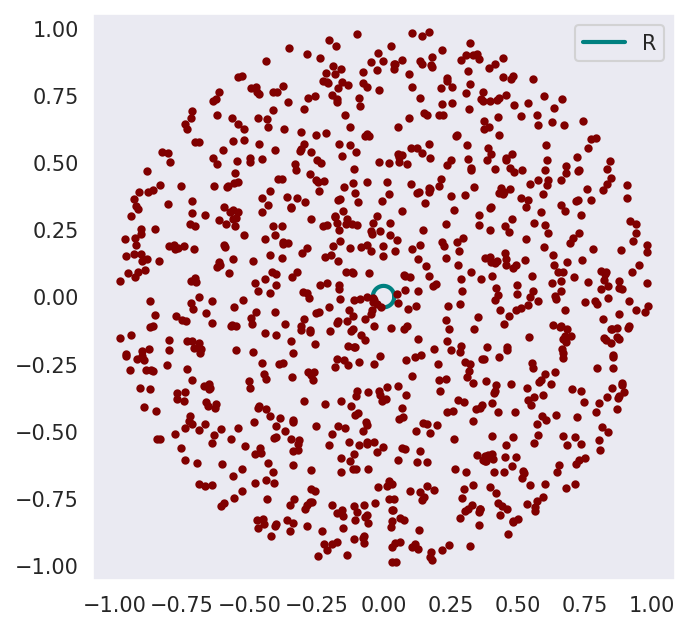

In [17]:
theta = np.linspace(0, np.pi*2, 200)
R = .04

aa = R * np.cos(theta)
bb = R * np.sin(theta)

fig = plt.figure(figsize = (5, 5), dpi = 150)
plt.plot(aa,bb, c = 'teal', linewidth=2)
plt.legend('R')

plt.plot(s[:,0],s[:,1],".", color = 'maroon')

plt.axis('equal')

In [20]:
# class Leaf:
    
#     def __init__(self, coords):
#         x, y = coords
#         self.Xpos = x
#         self.Ypos = y
#         self.position = coords


In [151]:
class Tree:
    
    def __init__(self, value, R):
        leaves = []
        for i in range(value):
            x = inner_points(R)
            leaves.append(x)
        
        self.value = value
        self.leaves = np.array(leaves)
        self.radius = R
        
        branches = []
        self.branches = np.array(branches)
        
 

In [127]:
lvs = Tree(1000, 1)

In [128]:
x, y = np.mgrid[0:10, 0:10]
points = np.c_[x.ravel(), y.ravel()]
tree = KDTree(points)

In [129]:
sorted(tree.query_ball_point([2, 0], 1))

[10, 20, 21, 30]

In [130]:
points = np.asarray(points)

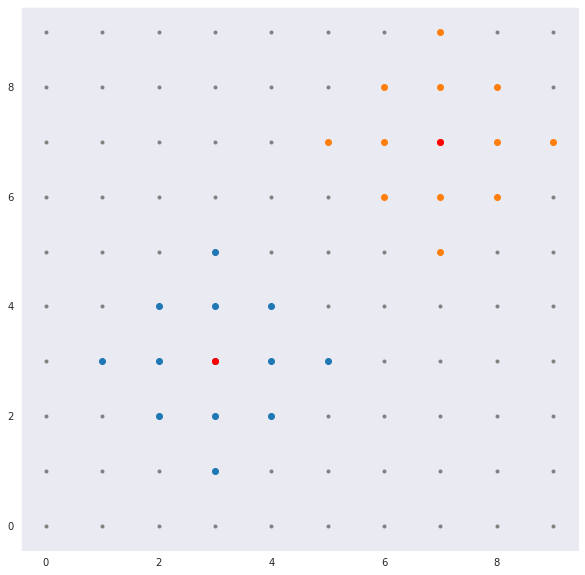

In [131]:
fig = plt.figure(figsize=(10, 10))
plt.plot(points[:, 0], points[:, 1], '.', c = 'gray')
for i in tree.query_ball_point(([3, 3], [7, 7]), 2):
    nearby = points[i]
    plt.plot(nearby[:, 0], nearby[:, 1], 'o')

plt.plot(3, 3, 'o', c='red')
plt.plot(7, 7, 'o', c='red')

# plt.margins(0.2, 0.2)

In [132]:
tree_cloud = KDTree(lvs.leaves)

Text(0.5, 1.0, 'Attraction area')

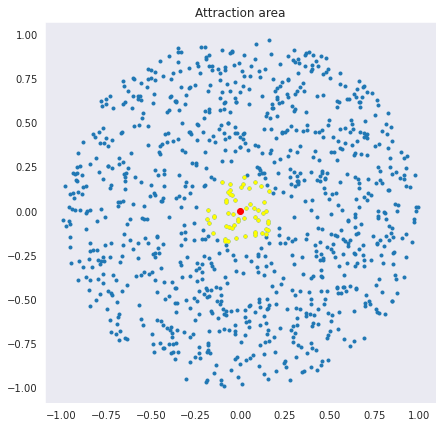

In [133]:
fig = plt.figure(figsize=(7, 7))
plt.plot(lvs.leaves[:, 0], lvs.leaves[:, 1], '.')
for i in tree_cloud.query_ball_point(([0,0]), .2):
    nearby = lvs.leaves[i]
    plt.plot(nearby[0], nearby[1], '.', c='yellow')
plt.plot(0, 0, 'o', c='red')
plt.title('Attraction area')

In [134]:
vectors = []
root = np.asarray([0, 0])
for nbr in tree_cloud.query_ball_point(root, .1):
    tip = lvs.leaves[nbr]
    vec = np.array([root, tip])
    vectors.append(vec)

In [135]:
vectors = np.asarray(vectors)

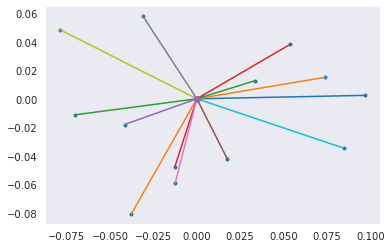

In [136]:

plt.plot(vectors[:, 1, 0], vectors[:, 1, 1], '.')
for v in vectors[:, 1]:
    x1, y1 = root
    x2, y2 = v
    plt.plot([x1, x2], [y1, y2])
plt.plot(root[0], root[1], 'o')

In [137]:
def SumDirection(vectors):
    direction = vectors[:, 1].sum(axis=0)
    #np.linalg.norm() is a magnitude of the vector
    unit =(direction/(np.linalg.norm(direction)))
    return unit

In [138]:
d = SumDirection(vectors)

In [139]:
def RotVect(v, angle):
    theta = np.radians(angle)
    c, s = np.cos(theta), np.sin(theta)
    RM = np.array([[c, -s], [s, c]])
    rot = np.dot(RM, v)
    return rot

In [140]:
def Segm(parent, vect, l, thick=None):
    
    if np.linalg.norm(vect) != 1:
        vect = vect/(np.linalg.norm(vect))
        
    x, y = parent
    dx, dy = l*vect
    return np.array([x+dx, y+dy])

In [141]:
Segm(root, d, 0.1)

array([ 0.05373163, -0.08433808])

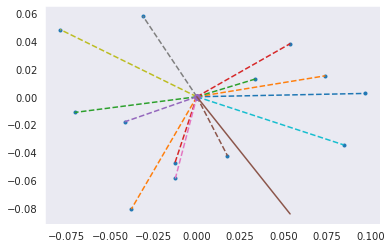

In [142]:
plt.plot(vectors[:, 1, 0], vectors[:, 1, 1], '.')
for v in vectors[:, 1]:
    x1, y1 = root
    x2, y2 = v
    plt.plot([x1, x2], [y1, y2], '--')
plt.plot(root[0], root[1], 'o')
plt.plot([root[0], Segm(root, d, 0.1)[0]], [root[1], Segm(root, d, 0.1)[1]])
# plt.plot([root[0], Segm(root, d, .5)[0]], [root[1], Segm(root, d, 0.5)[1]])

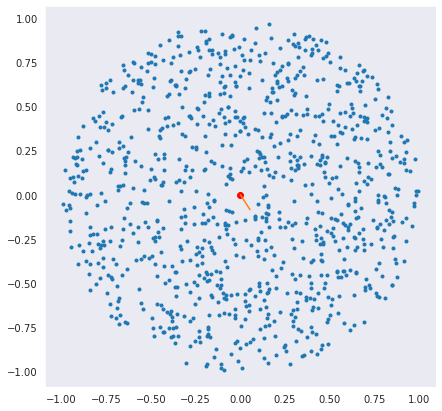

In [143]:
fig = plt.figure(figsize=(7, 7))
# plt.plot(lvs.leaves[:, 0], lvs.leaves[:, 1], '.')

mask = np.array(lvs.leaves, dtype=bool)

for i in sorted(tree_cloud.query_ball_point(root, .1), reverse=True):
    mask[i] = False
    
#without neighbours
w_nearby = lvs.leaves[mask]
    
plt.plot(w_nearby[::2],w_nearby[1::2], '.')
plt.plot(0, 0, 'o', c='red')
plt.plot([root[0], Segm(root, d, 0.1)[0]], [root[1], Segm(root, d, 0.1)[1]])

In [144]:
class Branch():
    def __init__(self, pos, di, l, thick=None):
        self.pos = pos
        self.direction = di
        self.thickness = thick
        self.length = l
        self.segment = Segm(pos, di, l)
        
        def plot_branch(self):
            pass
        
    

#### 2. Growth

*TO-DO NEXT*

- Хранить ветки как Networkx DiGraph
- Направление роста как сумма точек в Ar
- На каждой итерации пробегать все узлы, проверяя наличие доступных точек в Ar
> *Как организовать доступ ко всем активным точкам роста?*

- Добавить рандомную составляющую в направления

In [155]:
############
#PARAMETERS#
############

leaves = Tree(1000, 1)


mm = 1
mkm = 0.001*mm
nm = 0.001*mkm

#set of attraction points
LEAVES = leaves.leaves
#area radius
R = leaves.radius
#attraction range
Ar = 0.05*mm
#kill distance
Dk = 0.02*mm
#branch lenght
Bl = 0.01*mm
#branch probability
BrP = 0.5*mm

''' kill distance have to be lower than the attraction range, but should also be greater
than the branch length to avoid weird results'''

#starting point
initial_br = Branch(root, np.array([0, 1]), Bl)

In [156]:
dist, num = tree_cloud.query(initial_br.segment, k=1)
new_segm = Segm(initial_br.segment, 
                initial_br.direction, 
                initial_br.length)

In [157]:
if dist < Ar:
    
    new_direction = np.array([new_segm, lvs.leaves[num]]).sum(axis=0)
    new_direction =(new_direction/(np.linalg.norm(new_direction)))
    new_br = Branch(initial_br.segment, new_direction, dist)
    
else:
    new_br = Branch(initial_br.segment, 
                initial_br.direction, 
                initial_br.length)

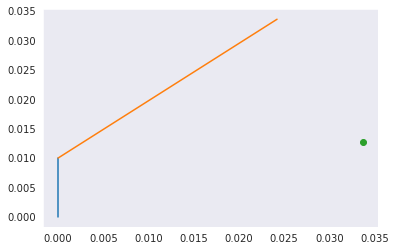

In [158]:
plt.plot([initial_br.pos[0], initial_br.segment[0]], [root[1], initial_br.segment[1]])
plt.plot([initial_br.segment[0], new_br.segment[0]], [initial_br.segment[1], new_br.segment[1]])
plt.plot(lvs.leaves[num][0], lvs.leaves[num][1], 'o')

In [197]:
def kill_attr(leaves, br):
    """ Removes the points that have reached Dk
    """
    tree = KDTree(leaves)
    mask = np.array(leaves, dtype=bool)
    for i in sorted(tree.query_ball_point(br.segment, Dk), reverse=True):
        mask[i] = False

    new_leaves = np.array(leaves[mask]).reshape(int(len(leaves[mask])/2), 2)
    return new_leaves

def Sum2di(di1, di2):
    """ Returns sum of two direstions as unit vector 
    """
    new_di = np.array([di1, di2]).sum(axis=0)
    u_di = (new_di/(np.linalg.norm(new_di)))
    return u_di

def SumAlldi(directions, v=None):
        if v == None:
            pass

def Grow(leaves, start_br, Ar, Dk, Bl):
    """ Returns next branch referred to attraction points
    Compute next direction as sum of a branch direction and 
    direction toward nearest attraction point in Ar
    """
    tree = KDTree(leaves)
    dist, num = tree.query(start_br.segment, k=1)
    new_segm = Segm(start_br.segment, 
                start_br.direction, 
                start_br.length)
    
    if dist < Ar:
    
        # new_direction = np.array([new_segm, lvs.leaves[num]]).sum(axis=0)
        # new_direction =(new_direction/(np.linalg.norm(new_direction)))
        new_direction = Sum2di(new_segm.direction, lvs.leaves[num])
        new_br = Branch(start_br.segment, new_direction, Bl)
        
        
    else:
        new_br = Branch(start_br.segment, 
                    start_br.direction, 
                    start_br.length)
    
    return new_br

def Grow2(leaves, start_br, Ar, Dk, Bl):
    """ Returns next branch referred to attraction points
    Compute next direction as sum of a branch direction and 
    average of the normalized vectors toward all the 
    attraction points in Ar
    """
    tree = KDTree(leaves)
    new_segm = Segm(start_br.segment, 
            start_br.direction, 
            start_br.length)
    
    di_neighbors = []
    for nbr in tree_cloud.query_ball_point(start_br.segment, Ar):
        di = leaves[nbr]
        di_neighbors.append(di)
    
    if di_neighbors:
        new_direction = sum(map(lambda x: Sum2di(new_segm.direction, x), di_neighbors))/len(di_neighbors)
        new_br = Branch(start_br.segment, new_direction, Bl)
    else:
        new_br = Branch(start_br.segment, start_br.direction, Bl)
        
    return new_br

# def Fork(start_br, di1, di2):
#     new_segm = Segm(start_br.segment, 
#                 start_br.direction, 
#                 start_br.length)
    
#     new_di1 = Sum2di(new_segm, di1)
#     new_di2 =Sum2di(new_segm, di2)
    
#     new_br1 = Branch(start_br.segment, new_di1, start_br.length)
#     new_br2 = Branch(start_br.segment, new_di2, start_br.length)
    
#     return [new_br1, new_br2]

    

In [163]:
# def Make_Br(leaves, start_br, Ar, Dk, Bl):

def Make_Br(start_br, Ar, Dk, Bl, growth_algorithm = 'Grow2', steps = None):
    
    global LEAVES
    root = copy(start_br)
    # lvs = np.asarray(leaves)
    # tree = KDTree(lvs)
    tree = KDTree(LEAVES)
    RES = [root.segment]

    #works only with circle!!! 
    center = np.array([0, 0])
    R = R
    
    def grow_func():
        new_br = Grow(LEAVES, root, Ar, Dk, Bl)
        new_lvs = kill_attr(LEAVES, new_br)
        # lvs = new_lvs
        LEAVES = new_lvs
        new_tree = KDTree(LEAVES)
        tree = new_tree
        root = new_br
        RES.append(new_br.segment)
    
    def grow_func2():
        pass
        
    if growth_algorithm == 'Grow':
        
        if steps is not None:
            for i in range(steps):
                grow_func()
        else:
            while square_dist(center, RES[-1])< R:
                grow_func()


    elif growth_algorithm == 'Grow2':
        
        if steps is not None:
            for i in range(steps):
                grow_func2()
        else:
            while square_dist(center, RES[-1])< R:
                grow_func2()
            
        
#         if np.random.rand()<BrP:
            
#             angle = np.random.uniform(-np.pi/4, np.pi/4)
#             di1 = RotVect(new_br.direction, angle)
#             di2 = RotVect(new_br.direction, -angle)
#             nb1 = Branch(new_br.pos, di1, new_br.length)
#             nb2 = Branch(new_br.pos, di2, new_br.length)
#             new_lvs = kill_attr(LEAVES, nb1)
#             new_lvs = kill_attr(new_lvs, nb2)
#             LEAVES = new_lvs

#             return [np.array(RES), 
#                    Make_Br(nb1, Ar, Dk, Bl, BrP*0.5), 
#                    Make_Br(nb2, Ar, Dk, Bl, BrP*0.5)]
            
        
        # if len(tree.query_ball_point(root.segment, Ar/root.length))>=2:
        # if np.random.rand()<BrP:
        #     dist, num = tree.query(root.segment, k=2)
        #     new_br1, new_br2 = Fork(root, LEAVES[num[0]], LEAVES[num[1]])
        #     new_lvs = kill_attr(LEAVES, new_br1)
        #     new_lvs = kill_attr(new_lvs, new_br2)
        #     LEAVES = new_lvs
        #     """ How to add it???
        #     """
        #     if new_br1.segment is RES[-1]:
        #         return [np.array(RES), Make_Br(new_br2, Ar, Dk, Bl, BrP*0.5)]
        #     elif new_br2.segment is RES[-1]:
        #         return [np.array(RES), Make_Br(new_br1, Ar, Dk, Bl, Brp*0.5)]
            # else:
                
            
            
    return [np.array(RES)]

In [164]:
dist, num = tree.query(initial_br.segment, k=2)
np.max(dist)
num

array([0, 1])

In [65]:
M = Make_Br(initial_br, Ar, Dk, Bl, BrP)


In [66]:
def plot_(b,acc,lw=1,color='r'):
    v = np.array(b[0])
    lh = plt.plot(v[:,0],v[:,1], color=color, lw=lw)
    acc.append(lh)
    if len(b) > 1:
        for bx in b[1:]:
            plot_(bx,acc,lw,color)
    return acc

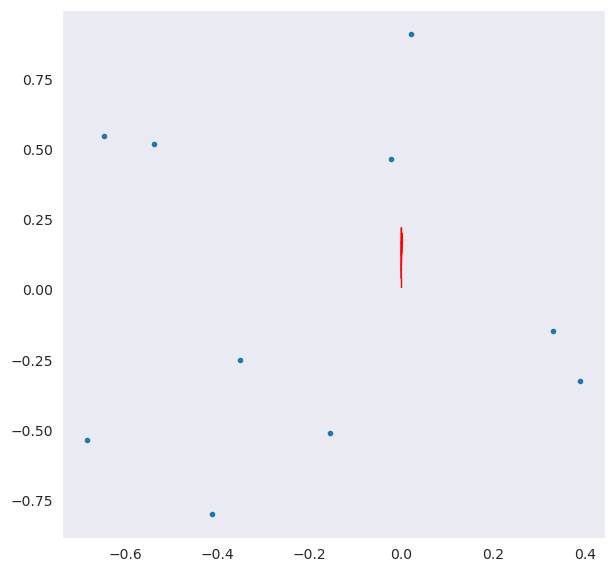

In [69]:
fig = plt.figure(figsize=(7, 7), dpi=100)
plot_(M, [])
plt.plot(lvs.leaves[:, 0], lvs.leaves[:, 1], '.')
# plt.xlim(-0.7, .2)
# plt.ylim(-0.4, .4)

# Bottom

In [117]:
def test(v, l, angle):
    theta = np.radians(angle)
    c, s = np.cos(theta), np.sin(theta)
    RM = np.array([[c, -s], [s, c]])
    d = np.dot(RM, v)

    return d


In [118]:
initial_br.direction

array([0, 1])

In [119]:
di = test(initial_br.direction, initial_br.length, 45)
di2 = test(initial_br.direction,initial_br.length, -45)

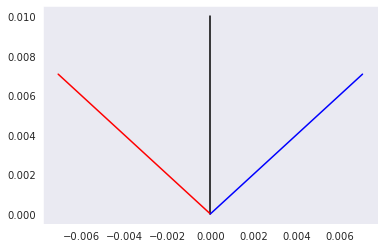

In [120]:
nb = Branch(initial_br.pos, di, initial_br.length)
nb2 = Branch(initial_br.pos, di2, initial_br.length)
plt.plot([initial_br.pos[0], initial_br.segment[0]],[initial_br.pos[1],initial_br.segment[1]], c='k')
plt.plot([nb.pos[0], nb.segment[0]],[nb.pos[1],nb.segment[1]], c='r')
plt.plot([nb2.pos[0], nb2.segment[0]],[nb2.pos[1],nb2.segment[1]], c='b')


In [ ]:
l1 = [1, 2, 3,4]

In [195]:
new_direction = sum(map(lambda x: Sum2di(initial_br.direction, x), vectors[:, 1]))/len(vectors)
new_br = Branch(initial_br.segment, new_direction, Bl)

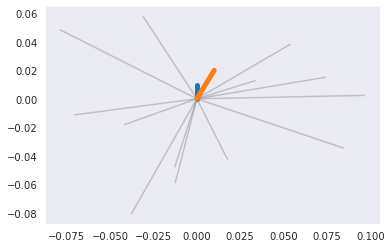

In [196]:
plt.plot(initial_br.pos, initial_br.segment, lw=5)
for v in vectors[:, 1]:
    x1, y1 = root
    x2, y2 = v
    plt.plot([x1, x2], [y1, y2], '-', alpha=0.4,color='gray')
plt.plot(new_br.pos, new_br.segment, lw=5)